In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

In [3]:
with h5py.File("./Input_Discretized.jld2") as file:
    FaultCenter = np.array(file["FaultCenter"]).T

In [4]:
with h5py.File("./Input_ExternalStressChange.jld2") as file:
    # print(file.keys())
    ExternalStress_TimeArray = np.array(file["ExternalStress_TimeArray"])
    # Cm_Delta_P = np.array(file["Cm_Delta_P"]).T
    # Delta_P = np.array( file["Delta_P"] ).T
    UniformPorePressureChange = np.array( file["UniformPorePressureChange"] ).T
    # ExternalStress_Normal = np.array(file["ExternalStress_Normal"]).T
    ExternalStress_Normal_Initial = np.array(file["ExternalStress_Normal_Initial"]).T
    ExternalStress_Normal_Poro = np.array(file["ExternalStress_Normal_Poro"]).T
    # ExternalStress_Shear = np.array(file["ExternalStress_Shear"]).T
    ExternalStress_Shear_Initial = np.array(file["ExternalStress_Shear_Initial"]).T
    ExternalStress_Shear_Poro = np.array(file["ExternalStress_Shear_Poro"]).T
    PorePressure = np.array( file["PorePressure"] ).T
    PorePressure_Initial = np.array( file["PorePressure_Initial"] ).T
    PorePressure_Poro = np.array( file["PorePressure_Poro"] ).T
     
ExternalStress_Normal = ExternalStress_Normal_Initial + ExternalStress_Normal_Poro
ExternalStress_Shear = ExternalStress_Shear_Initial + ExternalStress_Shear_Poro

In [5]:
Max_Time = ExternalStress_TimeArray[-1]
Year_in_Second = 365*24*3600 # 3e7

print("Max Time in Year:", Max_Time/Year_in_Second)

Max Time in Year: 20.0


In [6]:
TimeIdx_30 = np.where(UniformPorePressureChange == -30e6)[0][0]

Text(0.5, 1.0, '15.0 Year')

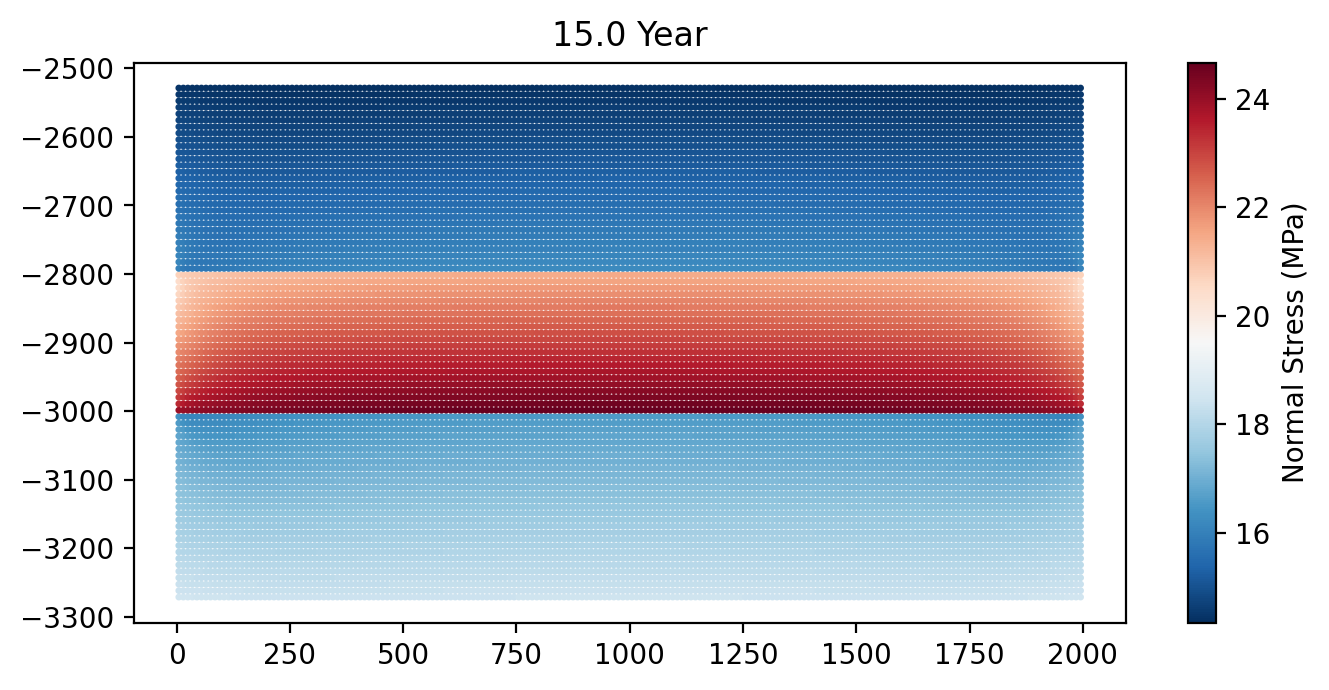

In [7]:
TimeStep = TimeIdx_30

fig = plt.figure(figsize=(8,8), dpi=200)
ax1 = fig.add_subplot(211)
im1 = ax1.scatter(FaultCenter[:,1], -FaultCenter[:,2], s = 2.0, 
                  c = 1e-6*ExternalStress_Normal[TimeStep,:], cmap='RdBu_r')
cb1 = fig.colorbar(im1, ax=ax1)
cb1.set_label("Normal Stress (MPa)")
plt.title(f'{ExternalStress_TimeArray[TimeStep]/Year_in_Second} Year')


Text(0.5, 1.0, '15.0 Year')

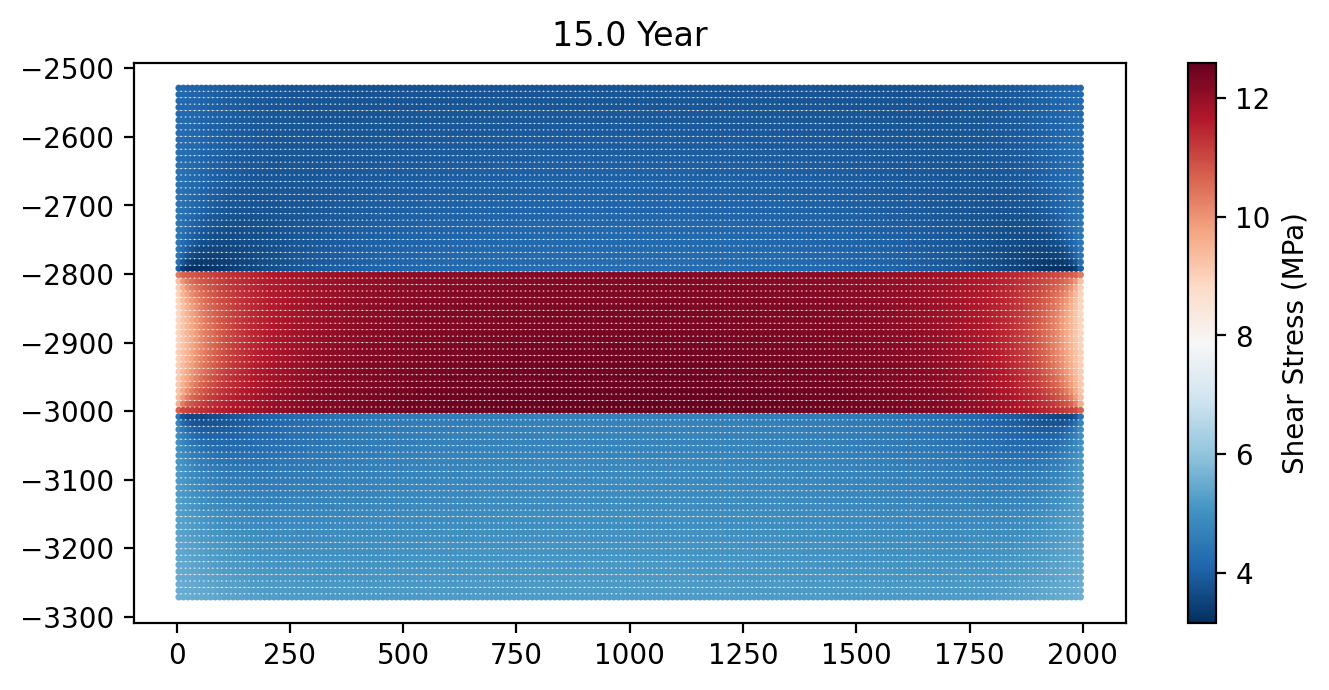

In [8]:
TimeStep = TimeIdx_30

fig = plt.figure(figsize=(8,8), dpi=200)
ax1 = fig.add_subplot(211)
im1 = ax1.scatter(FaultCenter[:,1], -FaultCenter[:,2],  s = 2.0, 
                  c = 1e-6*ExternalStress_Shear[TimeStep,:], cmap='RdBu_r')
cb1 = fig.colorbar(im1, ax=ax1)
cb1.set_label("Shear Stress (MPa)")
plt.title(f'{ExternalStress_TimeArray[TimeStep]/Year_in_Second} Year')


Text(0.5, 1.0, '$\\Delta P$= -30.0 MPa, Max SCU is 0.95')

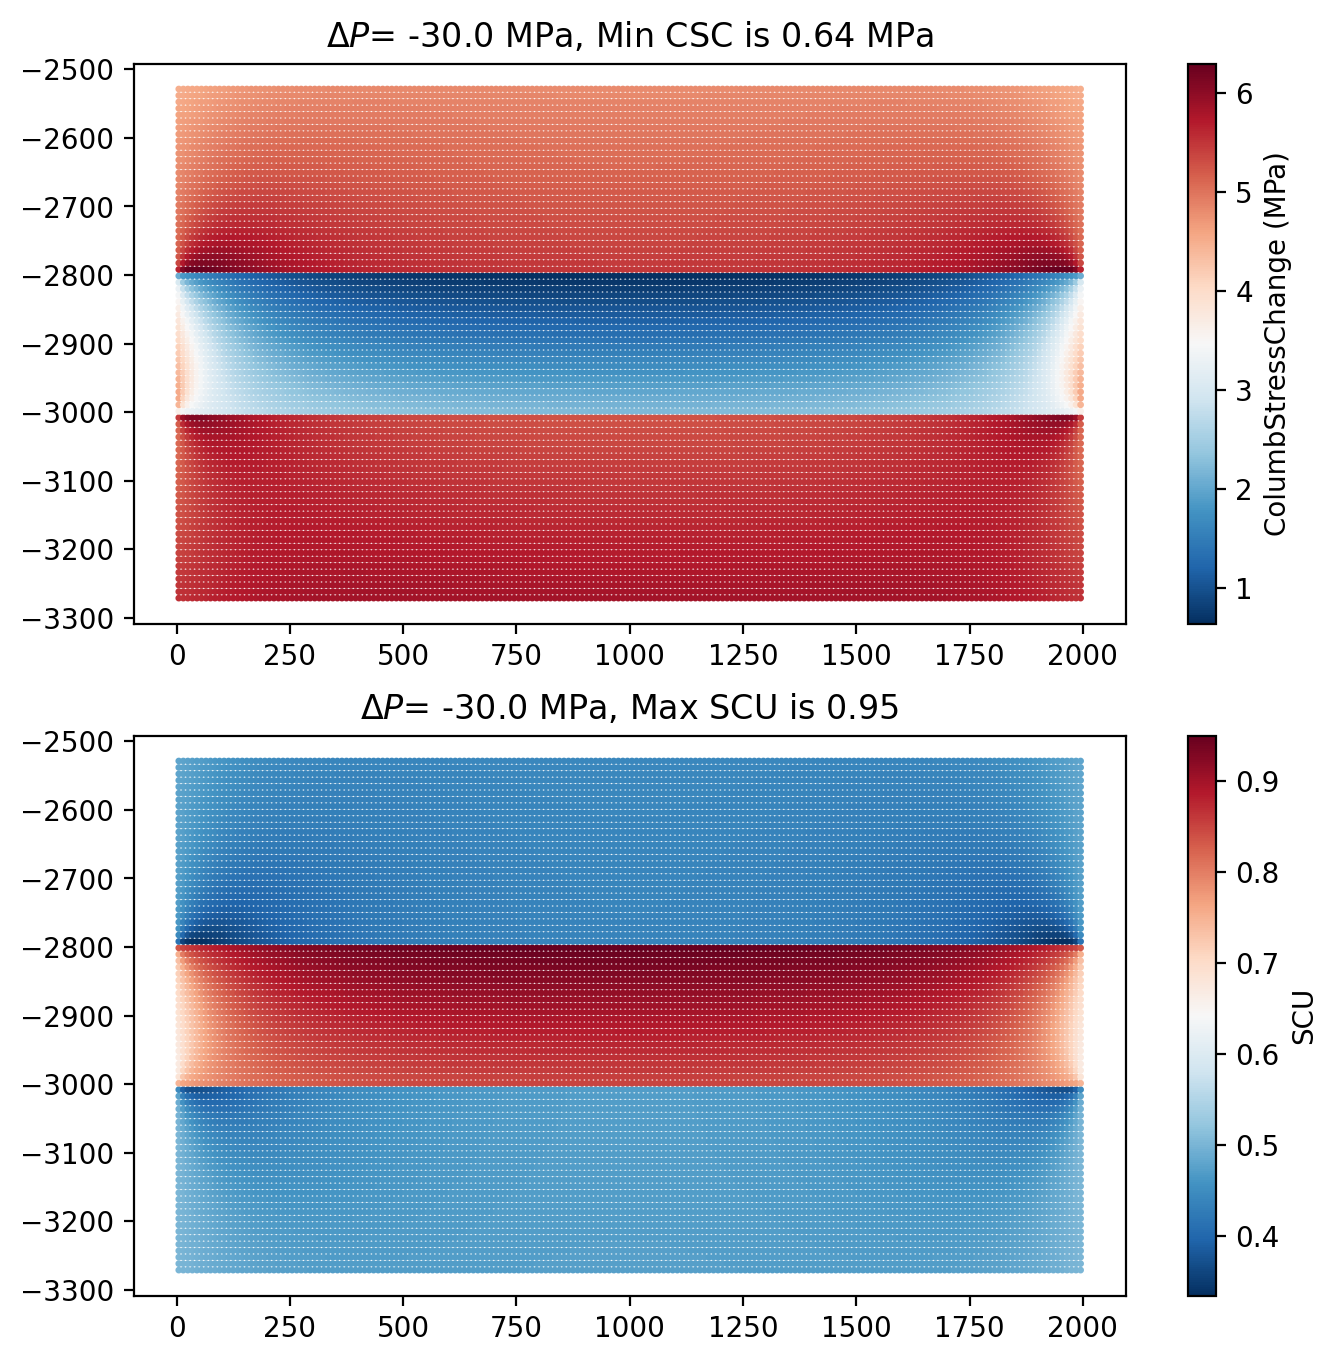

In [9]:
TimeStep = TimeIdx_30

DeltaP4plot = UniformPorePressureChange[TimeStep]*1e-6
ColumbStressChange =  (0.6*ExternalStress_Normal[TimeStep,:] - ExternalStress_Shear[TimeStep,:])*1e-6
SCU = ExternalStress_Shear[TimeStep,:] / (0.6*ExternalStress_Normal[TimeStep,:])

fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(211)
im1 = ax1.scatter(FaultCenter[:,1], -FaultCenter[:,2], s=2.0, 
                  c = ColumbStressChange, cmap='RdBu_r')
cb1 = fig.colorbar(im1, ax=ax1)
cb1.set_label("ColumbStressChange (MPa)")
ax1.set_title(f'$\Delta P$= {DeltaP4plot:.1f} MPa, Min CSC is {min(ColumbStressChange):.2f} MPa')

ax2 = fig.add_subplot(212)
im2 = ax2.scatter(FaultCenter[:,1], -FaultCenter[:,2], s=2.0,  
                  c=SCU, cmap='RdBu_r')
cb2 = fig.colorbar(im2, ax=ax2)
cb2.set_label("SCU")
ax2.set_title(f'$\Delta P$= {DeltaP4plot:.1f} MPa, Max SCU is {max(SCU):.2f}')

In [10]:
# Buijze 2019


dt = pd.DataFrame( pd.read_csv("./Buijze19_rawdata/fig2b_00MPa.csv")  )
RawNormalStressInside_00 = dt.values

dt = pd.DataFrame( pd.read_csv("./Buijze19_rawdata/fig2b_07MPa.csv")  )
RawNormalStressInside_07 = dt.values

dt = pd.DataFrame( pd.read_csv("./Buijze19_rawdata/fig2b_14MPa.csv")  )
RawNormalStressInside_14 = dt.values

dt = pd.DataFrame( pd.read_csv("./Buijze19_rawdata/fig2b_21MPa.csv")  )
RawNormalStressInside_21 = dt.values

dt = pd.DataFrame( pd.read_csv("./Buijze19_rawdata/fig2b_28MPa.csv")  )
RawNormalStressInside_28 = dt.values

dt = pd.DataFrame( pd.read_csv("./Buijze19_rawdata/fig2b_30MPa.csv")  )
RawNormalStressAll_30 = dt.values

RawNormalStressOutside_idx = np.where( (RawNormalStressAll_30[:,1]>-2800) | (RawNormalStressAll_30[:,1]<-3000) )[0]
RawNormalStressOutside = RawNormalStressAll_30[RawNormalStressOutside_idx,:]


RawNormalStressAll_00 = np.vstack( [RawNormalStressInside_00, RawNormalStressOutside] )
idx_sort = np.argsort(RawNormalStressAll_00[:,1])
RawNormalStressAll_00 = RawNormalStressAll_00[idx_sort, :]

RawNormalStressAll_28 = np.vstack( [RawNormalStressInside_28, RawNormalStressOutside] )
idx_sort = np.argsort(RawNormalStressAll_28[:,1])
RawNormalStressAll_28 = RawNormalStressAll_28[idx_sort, :]

In [11]:
dt = pd.DataFrame( pd.read_csv("./Buijze19_rawdata/fig2c_00MPa.csv")  )
RawShearStressInside_00 = dt.values

RawShearStressInside_21 = dt.values

dt = pd.DataFrame( pd.read_csv("./Buijze19_rawdata/fig2c_28MPa.csv")  )
RawShearStressInside_28 = dt.values

dt = pd.DataFrame( pd.read_csv("./Buijze19_rawdata/fig2c_30MPa.csv")  )
RawShearStressAll_30 = dt.values

RawShearStressOutside_idx = np.where( (RawShearStressAll_30[:,1]>-2800) | (RawShearStressAll_30[:,1]<-3000) )[0]
RawShearStressOutside = RawShearStressAll_30[RawShearStressOutside_idx,:]


RawShearStressAll_00 = np.vstack( [RawShearStressInside_00, RawShearStressOutside] )
idx_sort = np.argsort(RawShearStressAll_00[:,1])
RawShearStressAll_00 = RawShearStressAll_00[idx_sort, :]

RawShearStressAll_28 = np.vstack( [RawShearStressInside_28, RawShearStressOutside] )
idx_sort = np.argsort(RawShearStressAll_28[:,1])
RawShearStressAll_28 = RawShearStressAll_28[idx_sort, :]

In [12]:
RawNormalStressOutsideInterpZUpper = np.arange(-2600, -2800, -1)
RawNormalStressOutsideInterpValueUpper =  np.interp(RawNormalStressOutsideInterpZUpper, 
                                        RawNormalStressOutside[:,1], RawNormalStressOutside[:,0])
# RawNormalStressOutsideInterp = np.vstack([RawNormalStressOutsideInterpValue, RawNormalStressOutsideInterpZ]).T

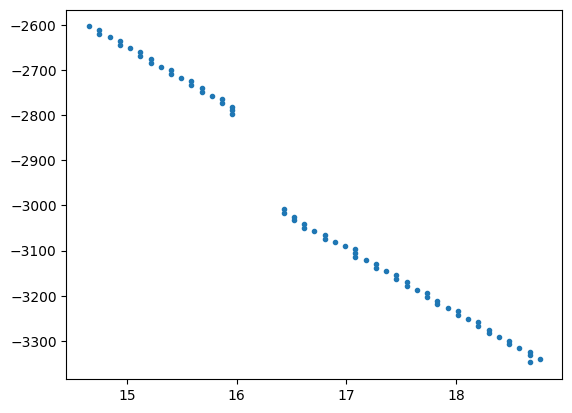

In [13]:
plt.plot( RawNormalStressOutside[:,0], RawNormalStressOutside[:,1], '.' )

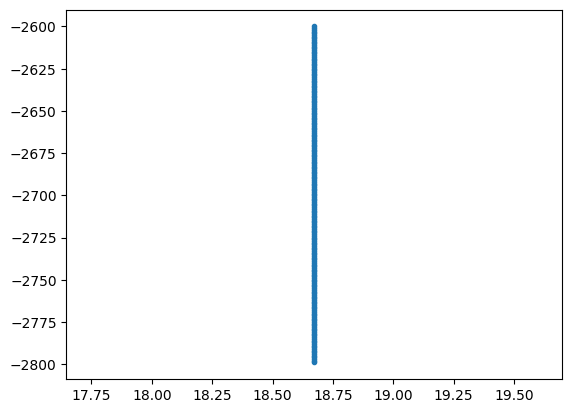

In [14]:
plt.plot( RawNormalStressOutsideInterpValueUpper, RawNormalStressOutsideInterpZUpper, '.' )

In [15]:
Idx_CLine = np.where(  FaultCenter[:,1] == 995 )[0]

In [16]:
TimeIdx_28 = np.argmin( np.abs(np.min(PorePressure_Poro, axis = 1) - (-28e6) ) )
print(TimeIdx_28)

139


Text(0.5, 0, 'Shear Stress (MPa), $\\Delta P$=-28MPa')

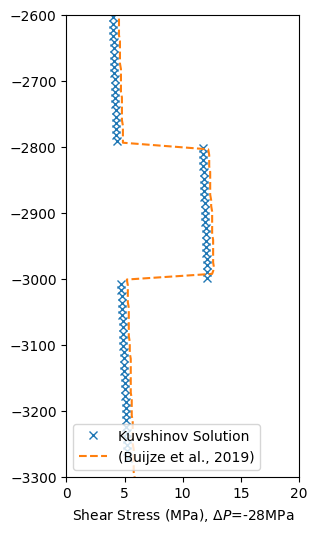

In [24]:
fig = plt.figure(figsize=(3,6), dpi=100)
ax = fig.add_subplot()
# ax.scatter(1e-6*ExternalStress_Shear[TimeIdx_28,:], -FaultCenter[:,2], marker='x',s=16, label='Kuvshinov Solution')
ax.plot(1e-6*ExternalStress_Shear[TimeIdx_28,Idx_CLine], -FaultCenter[Idx_CLine,2], 'C0x', label='Kuvshinov Solution')
ax.plot(RawShearStressAll_28[:,0], RawShearStressAll_28[:,1], 'C1--',label='(Buijze et al., 2019)')

ax.legend()
ax.set_xlim(0, 20)
ax.set_ylim(-3300, -2600)
ax.set_xlabel('Shear Stress (MPa), $\Delta P$=-28MPa')

Text(0.5, 0, 'Shear Stress (MPa), $\\Delta P$=0MPa')

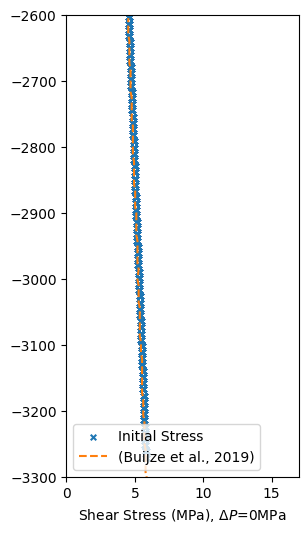

In [18]:
fig = plt.figure(figsize=(3,6), dpi=100)
ax = fig.add_subplot()
ax.scatter(1e-6*ExternalStress_Shear_Initial[0,:], -FaultCenter[:,2], marker='x',s=16, label='Initial Stress')
ax.plot(RawShearStressAll_00[:,0], RawShearStressAll_00[:,1], 'C1--',label='(Buijze et al., 2019)')

ax.legend()
ax.set_xlim(0, 17)
ax.set_ylim(-3300, -2600)
ax.set_xlabel('Shear Stress (MPa), $\Delta P$=0MPa')

Text(0.5, 0, 'Normal Stress (MPa), $\\Delta P$=-28MPa')

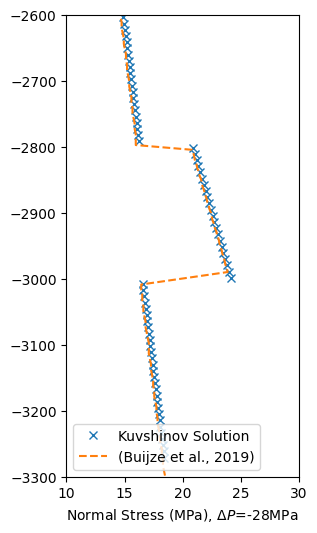

In [23]:
fig = plt.figure(figsize=(3,6), dpi=100)
ax = fig.add_subplot()
# ax.scatter(1e-6*ExternalStress_Normal[TimeIdx_28,:], -FaultCenter[:,2], marker='x', s=16, label='Kuvshinov Solution')
ax.plot(1e-6*ExternalStress_Normal[TimeIdx_28,Idx_CLine], -FaultCenter[Idx_CLine,2], 'C0x',label='Kuvshinov Solution')
ax.plot(RawNormalStressAll_28[:,0], RawNormalStressAll_28[:,1], 'C1--',label='(Buijze et al., 2019)')

ax.legend()
ax.set_xlim(10, 30)
ax.set_ylim(-3300, -2600)
ax.set_xlabel('Normal Stress (MPa), $\Delta P$=-28MPa')

Text(0.5, 0, 'Normal Stress (MPa), $\\Delta P$=0MPa')

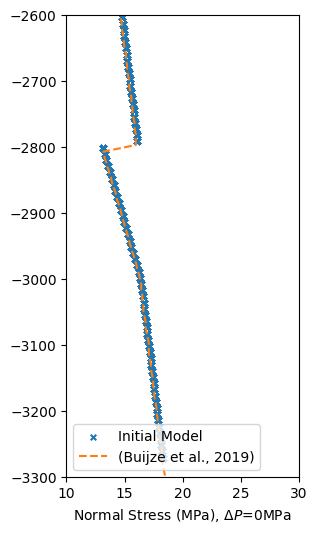

In [20]:
fig = plt.figure(figsize=(3,6), dpi=100)
ax = fig.add_subplot()
# ax.plot(1e-6*ExternalStress_Normal_Initial[0,:], -FaultCenter[:,2], 'x')
ax.scatter(1e-6*ExternalStress_Normal_Initial[0,:], -FaultCenter[:,2], marker='x', s=16, label='Initial Model')
ax.plot(RawNormalStressAll_00[:,0], RawNormalStressAll_00[:,1], 'C1--', label='(Buijze et al., 2019)')

ax.legend()
ax.set_xlim(10, 30)
ax.set_ylim(-3300, -2600)
ax.set_xlabel('Normal Stress (MPa), $\Delta P$=0MPa')